In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Train/Test/Split

In [4]:
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=13)


In [6]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# y_train = F.one_hot(torch.LongTensor(y_train))  # not needed with Cross Entropy Loss
# y_test = F.one_hot(torch.LongTensor(y_test))
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [7]:
X_test.shape

torch.Size([154, 8])

In [8]:
trainloader = DataLoader(X_train, batch_size=60, shuffle=True)

testloader = DataLoader(X_test, batch_size=60, shuffle=False)

# Create a model class

In [9]:
class Model(nn.Module):
    def __init__(self,input_layer=8,h1=128,h2=64,h3=32,h4=16,h5=8,output_layer=2):
        super().__init__()
        self.fc1 = nn.Linear(input_layer,h1)      #input layers
        self.fc2 = nn.Linear(h1, h2)              #hidden layers
        self.fc3 = nn.Linear(h2, h3)               
        self.fc4 = nn.Linear(h3, h4)
        self.fc5 = nn.Linear(h4, h5)              #hidden layers
        self.out = nn.Linear(h5, output_layer)    #output layers
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.out(x)
        return x

In [10]:
torch.manual_seed(42)
model = Model()

In [11]:
model

Model(
  (fc1): Linear(in_features=8, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=16, bias=True)
  (fc5): Linear(in_features=16, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=2, bias=True)
)

# Define loss  and optimizations

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# Train the model

In [13]:
epochs = 300
losses = []

for i in range(epochs):
    i+=1
    loss = criterion(model.forward(X_train), y_train)
    losses.append(loss)
    
    
    if i%10 == 0:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 10  loss: 0.68011552
epoch: 20  loss: 0.65978283
epoch: 30  loss: 0.64796150
epoch: 40  loss: 0.63812232
epoch: 50  loss: 0.62996554
epoch: 60  loss: 0.62381285
epoch: 70  loss: 0.61775011
epoch: 80  loss: 0.61231488
epoch: 90  loss: 0.60737461
epoch: 100  loss: 0.60328001
epoch: 110  loss: 0.59980196
epoch: 120  loss: 0.59694731
epoch: 130  loss: 0.59439218
epoch: 140  loss: 0.59198296
epoch: 150  loss: 0.58976072
epoch: 160  loss: 0.58754599
epoch: 170  loss: 0.58531278
epoch: 180  loss: 0.58315700
epoch: 190  loss: 0.58104986
epoch: 200  loss: 0.57907003
epoch: 210  loss: 0.57714486
epoch: 220  loss: 0.57529390
epoch: 230  loss: 0.57338345
epoch: 240  loss: 0.57155526
epoch: 250  loss: 0.56971598
epoch: 260  loss: 0.56804842
epoch: 270  loss: 0.56646919
epoch: 280  loss: 0.56485009
epoch: 290  loss: 0.56309015
epoch: 300  loss: 0.56131351


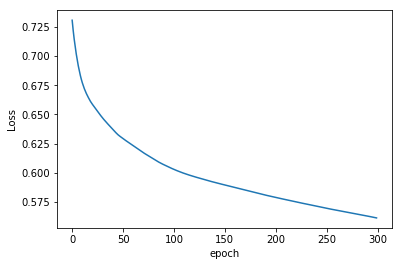

In [14]:
### plot
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

# Evaluate the model

In [15]:
with torch.no_grad():
    y_val = model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

0.59186786


In [16]:
correct = 0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)
        print(f'{i+1:2}. {str(y_val):38}  {y_test[i]}')
        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

 1. tensor([-0.1219, -0.0960])              0
 2. tensor([-0.0523, -2.3144])              0
 3. tensor([-0.1668, -0.5864])              0
 4. tensor([-0.1219, -0.0960])              1
 5. tensor([-0.2049, -0.7074])              0
 6. tensor([-0.4014, -1.6803])              0
 7. tensor([-0.1045, -2.2875])              0
 8. tensor([-0.0734, -2.2632])              0
 9. tensor([-0.1505, -0.6099])              0
10. tensor([-0.2148, -0.8849])              1
11. tensor([-0.3066, -1.4367])              0
12. tensor([-0.3674, -1.6411])              0
13. tensor([-0.4403, -1.9901])              0
14. tensor([-0.1219, -0.0960])              1
15. tensor([-0.1449, -0.4972])              0
16. tensor([-0.1714, -0.4660])              0
17. tensor([-0.1498, -1.6043])              1
18. tensor([-0.1356, -0.2923])              0
19. tensor([-0.1267, -0.2202])              1
20. tensor([-0.1498, -0.3430])              0
21. tensor([-0.2555, -1.2535])              0
22. tensor([-0.1344, -0.1234])    

In [18]:
#Save the Model
torch.save(model.state_dict(), 'diabetes.pt')

113 out of 154 = 73.38% correct. As you can see, our model works with 73% accuracy. 

